<a href="https://colab.research.google.com/github/aadyajha12/hello-world/blob/main/700074574_ECM3420_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECM 3420 Code for Linear Regression, Ridge Regression, Lasso Regression, Simple RNN and Long Short Term Memory networks**

Project: Stock Price Predictor Model with Best Accuracy - 700074574

The aim of this project is to accurately predict the future closing value of AT&T Communications given period time in the future. For this project, I will be using Linear Regression, Ridge Regression, Lasso Regression, Simple RNN and LSTMs to predict the closing price of the AT&T SBC Communication 2000 - 2020 dataset from [Kaggle](https://www.kaggle.com/datasets/konstantinparfenov/att-sbc-stock-price-data).

**Step 1:** Import the necessary libraries needed for this code to work for all ML models.

In [ ]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import style
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
# importing libraries for LTSTM
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Activation , Bidirectional
%matplotlib inline

# **Get the Data**
**Step 2:** In the following cells we upload the file of the AT&T stock and save the dataset as a dataframe. <br>
**Step 3:** We also remove unecessary data and set the date as an index. <br>
**Step 4:** We see the infromation of the important columns of the dataframe. <br>
**Step 5:** We plot using pairplot to see the relationship between each attribute with each other.

In [ ]:
dataframe = pd.read_csv("AT_T_SBC_Stock_Price_Data_2000_2020.csv")

# filter out the columns to necessary ones needed for analysis
important_cols = ["DATE", "OPENPRC", "VOL", "BIDLO", "ASKHI", "PRC"]
dataframe1 = dataframe[important_cols]
dataframe1['DATE'] = pd.to_datetime(dataframe1['DATE'].astype(str), format='%Y%m%d')
dataframe1.set_index('DATE', inplace=True)

dataframe1.info()
#sns.pairplot(dataframe1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5287 entries, 2000-01-03 to 2020-12-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OPENPRC  5287 non-null   float64
 1   VOL      5287 non-null   int64  
 2   BIDLO    5287 non-null   float64
 3   ASKHI    5287 non-null   float64
 4   PRC      5287 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 247.8 KB


<ipython-input-32-8cb2296bdfe7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe1['DATE'] = pd.to_datetime(dataframe1['DATE'].astype(str), format='%Y%m%d')


**Step 6:** We visualise the data by plotting a line graph of the Closing Price against the date

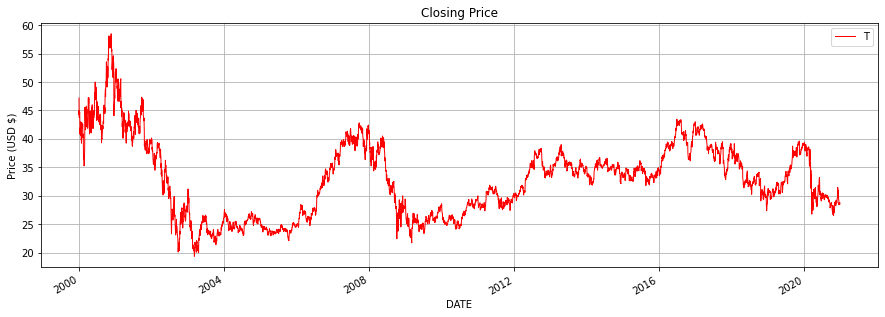

In [ ]:
dataframe1['PRC'].plot(label='T', figsize=(15, 5), title='Closing Price', color='red', linewidth=1.0, grid=True,ylabel='Price (USD $)')
plt.legend()

**Step 7:** Analysing the data by checking the first 5 rows of the dataset to see if the output is as desired.

In [ ]:
dataframe1.head()

,OPENPRC,VOL,BIDLO,ASKHI,PRC
DATE,,,,,
2000-01-03,48.5625,5791500,46.5000,49.00,47.1875
2000-01-04,47.0625,7173500,43.5000,47.75,44.2500
2000-01-05,45.0000,9090000,44.4375,45.25,44.9375
2000-01-06,44.5625,7154299,43.1250,45.00,43.7500
2000-01-07,44.5625,5883699,43.3750,44.75,44.1250


**Step 8:** Calculate the moving average to remove the noise in the graph and smoothen it.<br> <br>
A moving average (MA) is a stock indicator commonly used in technical analysis.
The moving average helps to level the price data over a specified period by creating a constantly updated average price. <br>
We are taking an average over the window size of 100. <br>
This is a gamble, as increasing the window size can make the data more smoother, but less informative and vice-versa.

In [ ]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = dataframe1['PRC']
mvag = close_col.rolling(window=100).mean() 

**Step 9:** Visualise the Moving Average and the Adjusted Closing Price in a graph

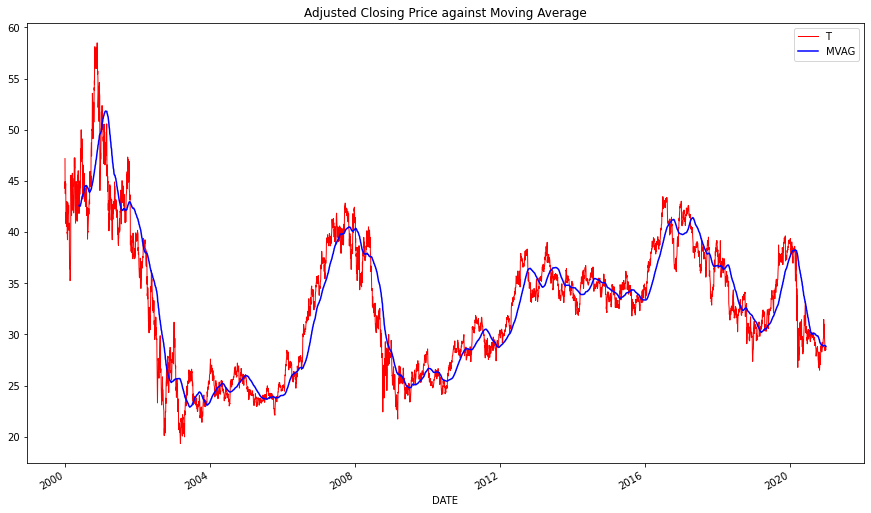

In [ ]:
# Visualising Rolling Mean and Adjusted Closing Price as a graph

dataframe1['PRC'].plot(label='T', figsize=(15,9), title='Adjusted Closing Price against Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

**Step 9:** Calculates the Standard Return of Deviation <br> <br>
Standard deviation of returs is a measure of volatility or risk.  The larger the return standard deviation, the larger the variations you can expect to see in returns.

The higher the Standard Deviation, the higher will be the ups and downs in the returns. For example, for a fund with a 15 percent average rate of return and an SD of 5 percent, the return will deviate in the range from 10-20 percent. <br> <br>

**Step 10:** Plots the graph of Standard Return of Deviation against Date

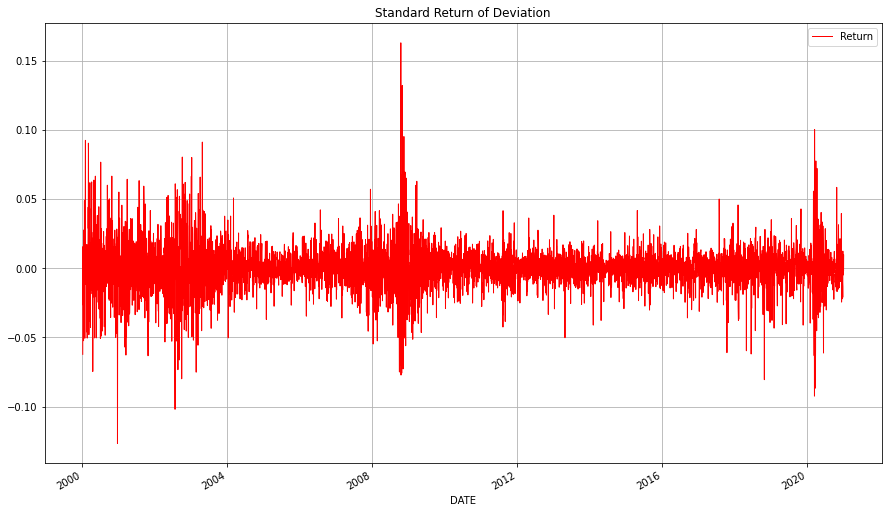

In [ ]:

# Measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 9), title='Standard Return of Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()
  

From this graph we can see the volatility of the stocks reaches a high around 2000 and 2008. This is probably due to the Financial Recession Crisis which happened in 2008 which made the stock market very unpredictable.

# **Prediction**

This is used to forecast the number of days for which the prediction will happen. <br>

Also creates the Prediction Row.

In [ ]:
# Number of days for which to predict the stock prices

days_predict = 30


# Shifting by the Number of Predict days for Prediction array

dataframe1['Prediction'] = dataframe1['PRC'].shift(-days_predict)


# Dropping the Prediction Row

X = np.array(dataframe1.drop(['Prediction'], axis = 1))
X = X[:-days_predict]      # Size upto predict days
print("X shape: ",X.shape)


# Creating the Prediction Row

y = np.array(dataframe1['Prediction'])
y = y[:-days_predict]      # Size up to days_predict
print("Y shape: ",y.shape)
        

X shape:  (5257, 5)
Y shape:  (5257,)


<ipython-input-39-e6723fd41111>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe1['Prediction'] = dataframe1['PRC'].shift(-days_predict)


# **Split Data into Train and Test pair**

**Step 11:** Splitting the data into 80% for training & 20% for testing and checking the shapes of the data after split.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)     

print( "X train shape: " , X_train.shape)
print("Y train  shape: ",y_train.shape)
print("X test shape: ",X_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (4205, 5)
Y train  shape:  (4205,)
X test shape:  (1052, 5)
Y test shape:  (1052,)


# **1. LINEAR REGRESSION**

The first model of Regression - Linear Regression

**Step 1:** We need to first define the Linear Regression Model <br> <Br>
**Step 2:** After defining, we need to train the algorithm.

In [ ]:
# Defining the Linear Regression Model and training the model

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

**Step 3:** Calculate the score of the model, with the test data and get the percentage.

In [ ]:
linear_model_score = LinReg.score(X_test, y_test)
print('Linear Model Score:', linear_model_score *100)

Linear Model Score: 84.97114960998208


**Step 4:** Define the Real and Prediction Values

In [ ]:
X_predict = np.array(dataframe1.drop(['Prediction'], 1))[-days_predict:]

linear_model_predict_prediction = LinReg.predict(X_predict)
predictions = LinReg.predict(X_test)
linear_model_real_prediction = LinReg.predict(np.array(dataframe1.drop(['Prediction'], 1)))
     

<ipython-input-43-6226e474e058>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_predict = np.array(dataframe1.drop(['Prediction'], 1))[-days_predict:]
<ipython-input-43-6226e474e058>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  linear_model_real_prediction = LinReg.predict(np.array(dataframe1.drop(['Prediction'], 1)))


We will then compare the predictions to the y_test variable to evaluate our model's performance. We can do this either by plotting the predicted values against the true values or by plotting a histogram of the difference between the two values.

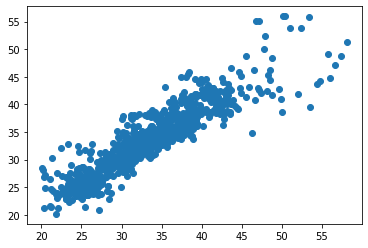

In [ ]:
plt.scatter(y_test, predictions)

(array([ 12.,  26.,  87., 362., 414., 122.,  17.,   4.,   7.,   1.]),
 array([-9.6801493 , -7.31328374, -4.94641818, -2.57955261, -0.21268705,
         2.15417851,  4.52104407,  6.88790963,  9.25477519, 11.62164075,
        13.98850631]),
 <a list of 10 Patch objects>)

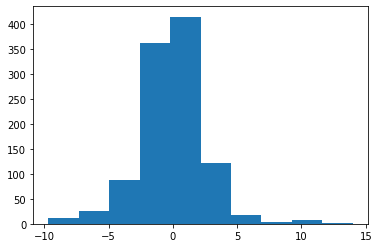

In [ ]:
plt.hist(y_test - predictions)

**Step 5:** Create an empty array for the predicted dates and define the parameters to plot the graph.

In [ ]:
predicted_dates = []
recent_date = dataframe1.index.max()
display_at = 1000
alpha = 0.5

for i in range(days_predict):
    recent_date += (timedelta(days=1))
    predicted_dates.append(recent_date)

**Step 6:** Plotting the Actual and Prediction Prices with the Forecast of 30 Days

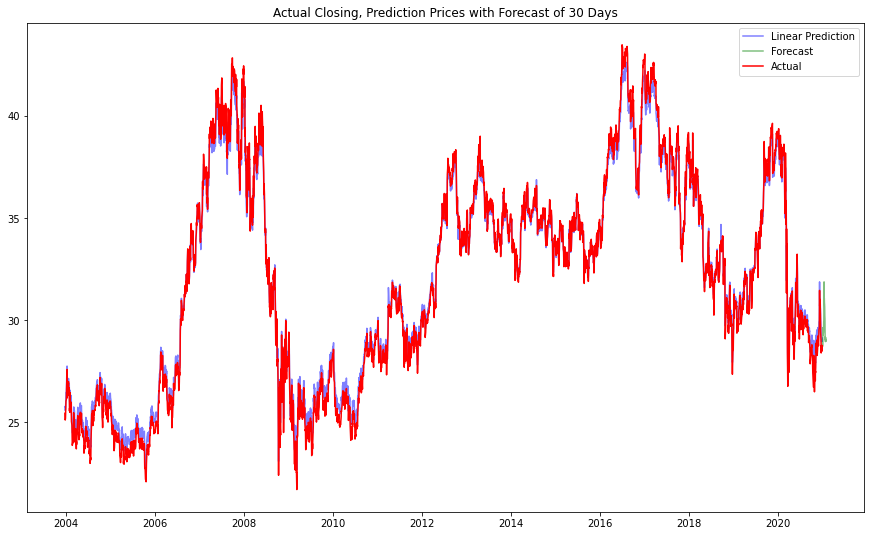

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(dataframe1.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(dataframe1.index[display_at:], dataframe1['PRC'][display_at:], label='Actual', color='red')
plt.title('Actual Closing, Prediction Prices with Forecast of 30 Days')
plt.legend()

# **2. RIDGE REGRESSION**

The second regression model used here is Ridge Regression.

**Step 1:** We need to first define the Ridge Regression Model <br> <Br>
**Step 2:** After defining, we need to train the algorithm.

In [ ]:
# Defining the Ridge Regression Model and training the algorithm

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.72446e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

**Step 3:** Calculate the score of the model, with the test data and get the percentage.

In [ ]:
# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score * 100)

Ridge Model score: 84.97119272544515


**Step 4:** Define the Actual and Prediction Values

In [ ]:
# Define the Actual & Prediction Values

ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(dataframe1.drop(['Prediction'], 1)))

<ipython-input-51-af5d1914951a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ridge_model_real_prediction = ridge_model.predict(np.array(dataframe1.drop(['Prediction'], 1)))


**Step 5:** Plotting the Actual and Prediction Prices in a graph to visualise

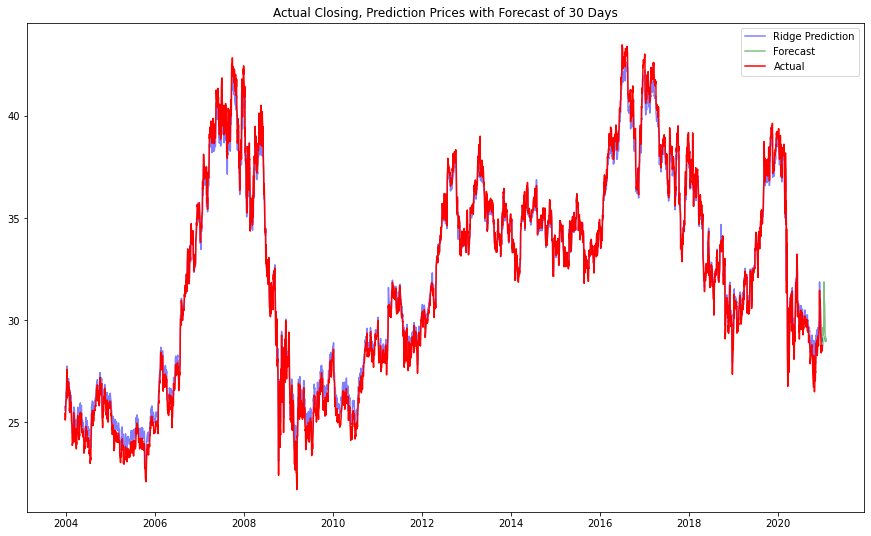

In [ ]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(dataframe1.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(dataframe1.index[display_at:], dataframe1['PRC'][display_at:], label='Actual', color='red')
plt.title('Actual Closing, Prediction Prices with Forecast of 30 Days')
plt.legend()

# **3. LASSO REGRESSION**

The third and last regression model used here is Lasso Regression.

**Step 1:** We need to first define the Lasso Regression Model <br> <Br>
**Step 2:** After defining, we need to train the algorithm.

In [ ]:
# Defining the Lasso Regression Model and Train the model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+04, tolerance: 1.819e+01
  model = cd_fast.enet_coordinate_descent(


Lasso()

**Step 3:** Calculate the score of the model, with the test data and get the percentage.

In [ ]:
# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score *100)
   

Lasso Model score: 84.89750399527742


**Step 4:** Define the Actual and Prediction Values

In [ ]:
# Define the actual & prediction Values

lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(dataframe1.drop(['Prediction'], 1)))

<ipython-input-55-8438a6d29a2b>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lasso_model_real_prediction = lasso_model.predict(np.array(dataframe1.drop(['Prediction'], 1)))


**Step 5:** Plotting the Actual and Prediction Prices in a graph to visualise

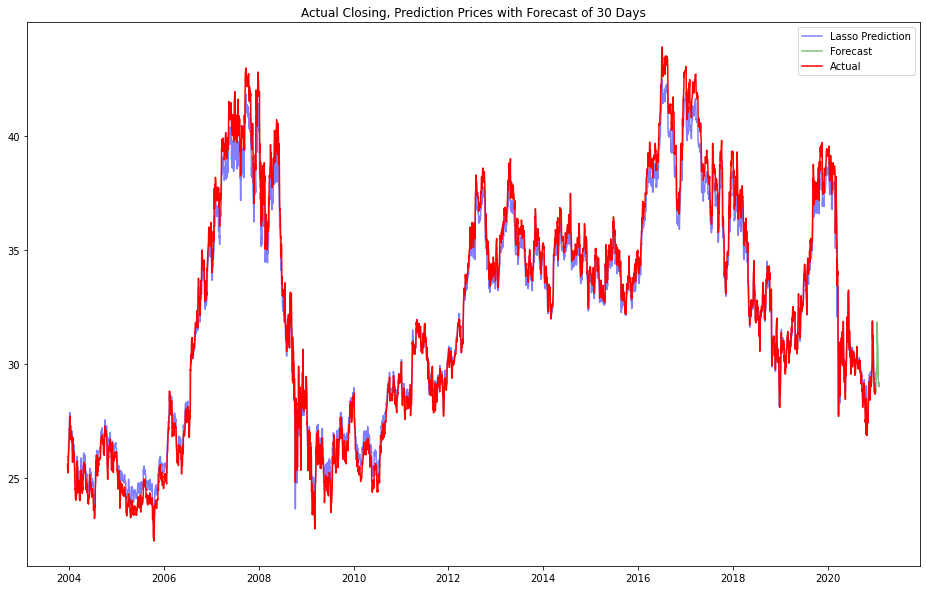

In [ ]:
# Plotting the Actual & Prediction Prices

plt.figure(figsize=(16, 10))
plt.plot(dataframe1.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(dataframe1.index[display_at:], dataframe1['ASKHI'][display_at:], label='Actual', color='red')
plt.title('Actual Closing, Prediction Prices with Forecast of 30 Days')
plt.legend()

# **Best Regression Model**

Since we have calculated the score for each model, we can check and see which model has the highest score and the best performance among all 3. This returns the percentage with 100% being perfect and 0% being completely inaccurate.

In [ ]:
# Best Performance

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Ridge Model with the score of 84.97119272544515%.


# **4. Simple RNN**

This loads the dataset into a dataframe and gets information about the dataset.

We split the data into the training and testing pair by 80% and 20% as the previous models for comparison.

In [ ]:
data = dataframe[important_cols]
data['DATE'] = pd.to_datetime(data['DATE'].astype(str), format='%Y-%m-%d')

data.info()
data.head()
length_data = len(data)     
split_ratio = 0.8          
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data length :", length_validation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     5287 non-null   datetime64[ns]
 1   OPENPRC  5287 non-null   float64       
 2   VOL      5287 non-null   int64         
 3   BIDLO    5287 non-null   float64       
 4   ASKHI    5287 non-null   float64       
 5   PRC      5287 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 248.0 KB
Data length : 5287
Train data length : 4230
Validation data length : 1057


<ipython-input-87-22d40df85bb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE'] = pd.to_datetime(data['DATE'].astype(str), format='%Y-%m-%d')


In [ ]:
train_data = data[:length_train].iloc[:,:6] 
train_data['DATE'] = pd.to_datetime(data['DATE'].astype(str), format='%Y-%m-%d')
train_data

,DATE,OPENPRC,VOL,BIDLO,ASKHI,PRC
0,2000-01-03,48.5625,5791500,46.5000,49.000,47.1875
1,2000-01-04,47.0625,7173500,43.5000,47.750,44.2500
2,2000-01-05,45.0000,9090000,44.4375,45.250,44.9375
3,2000-01-06,44.5625,7154299,43.1250,45.000,43.7500
4,2000-01-07,44.5625,5883699,43.3750,44.750,44.1250
...,...,...,...,...,...,...
4225,2016-10-13,39.2800,17546584,39.0200,39.480,39.3700
4226,2016-10-14,39.4100,13516996,39.2200,39.575,39.2200
4227,2016-10-17,39.1000,13885020,39.0500,39.490,39.2700
4228,2016-10-18,39.2300,16038459,39.1500,39.450,39.3600


In [ ]:
validation_data = data[length_train:].iloc[:,:6]
validation_data['DATE'] = pd.to_datetime(validation_data['DATE'])  # converting to date time object
validation_data

,DATE,OPENPRC,VOL,BIDLO,ASKHI,PRC
4230,2016-10-20,39.05,31131452,38.50,39.0800,38.65
4231,2016-10-21,38.40,82764994,36.96,38.6700,37.49
4232,2016-10-24,36.51,100586152,36.30,37.3300,36.86
4233,2016-10-25,37.01,40486449,36.55,37.0600,36.70
4234,2016-10-26,36.64,32878669,36.27,36.7700,36.43
...,...,...,...,...,...,...
5282,2020-12-24,28.73,19153092,28.50,28.7600,28.69
5283,2020-12-28,28.93,41619463,28.50,28.9591,28.55
5284,2020-12-29,28.69,36617545,28.51,28.8800,28.54
5285,2020-12-30,28.54,34347761,28.43,28.6800,28.49


**Creating Train Dataset from Train Split**


*  We will get the PRC Column as our dataset
*  Dataset will be converted to array



In [ ]:
dataset_train = train_data.PRC.values
dataset_train.shape

(4230,)

Change 1d array to 2d array


Changing shape from (1692,) to (1692,1)

In [ ]:

dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(4230, 1)

**Normalisation** <br>
Dataset values will be in between 0 and 1 after scaling

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(4230, 1)

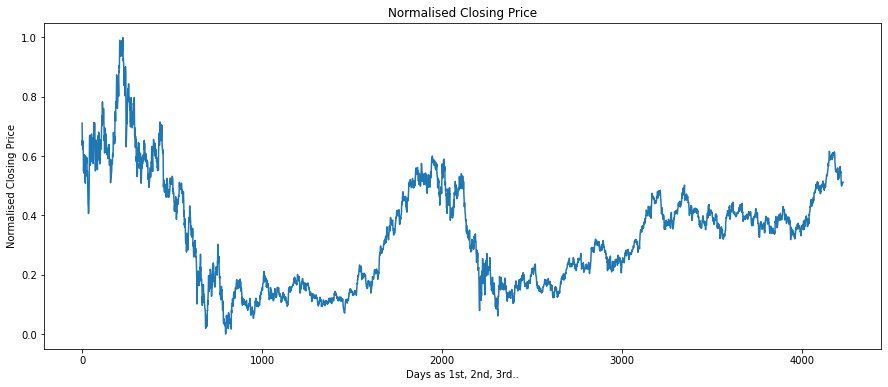

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Normalised Closing Price")
plt.title('Normalised Closing Price')
plt.show()

**Creating X_train and Y_train from Train Data**

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (4180, 50)
Shape of y_train before reshape : (4180,)


**Reshaping**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (4180, 50, 1)
Shape of y_train after reshape : (4180, 1)


In [ ]:
X_train[0]

array([[0.71112104],
       [0.63610827],
       [0.65366445],
       [0.62334014],
       [0.63291624],
       [0.6488764 ],
       [0.63291624],
       [0.57386364],
       [0.54832737],
       [0.57705567],
       [0.55630746],
       [0.54194331],
       [0.55311542],
       [0.60418795],
       [0.57865169],
       [0.52438713],
       [0.52757916],
       [0.51800306],
       [0.50842697],
       [0.60099591],
       [0.58822778],
       [0.59141982],
       [0.57865169],
       [0.57865169],
       [0.57545965],
       [0.5802477 ],
       [0.59461185],
       [0.58184372],
       [0.53236721],
       [0.54992339],
       [0.54034729],
       [0.50363892],
       [0.48608274],
       [0.43660623],
       [0.43181818],
       [0.40628192],
       [0.40947395],
       [0.41106997],
       [0.45097038],
       [0.47810266],
       [0.56588355],
       [0.65526047],
       [0.66962462],
       [0.61376404],
       [0.57865169],
       [0.56907559],
       [0.56907559],
       [0.578

In [ ]:
y_train[0]

array([0.59141982])

**Creating the RNN Model**

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train,validation_split=0.33, epochs = 50, batch_size = 32)

Epoch 1/50
88/88 [==============================] - 8s 62ms/step - loss: 0.5060 - accuracy: 3.5714e-04 - val_loss: 0.0238 - val_accuracy: 0.0000e+00
Epoch 2/50
88/88 [==============================] - 5s 56ms/step - loss: 0.1825 - accuracy: 3.5714e-04 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 3/50
88/88 [==============================] - 5s 57ms/step - loss: 0.1073 - accuracy: 7.1429e-04 - val_loss: 4.2189e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
88/88 [==============================] - 5s 57ms/step - loss: 0.0636 - accuracy: 7.1429e-04 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 5/50
88/88 [==============================] - 5s 58ms/step - loss: 0.0485 - accuracy: 7.1429e-04 - val_loss: 6.8163e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
88/88 [==============================] - 5s 58ms/step - loss: 0.0363 - accuracy: 3.5714e-04 - val_loss: 4.9522e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
88/88 [==============================] - 5s 57ms/step - loss: 0.0278 - accuracy: 7.

# Plotting Loss vs Epochs for the RNN Model

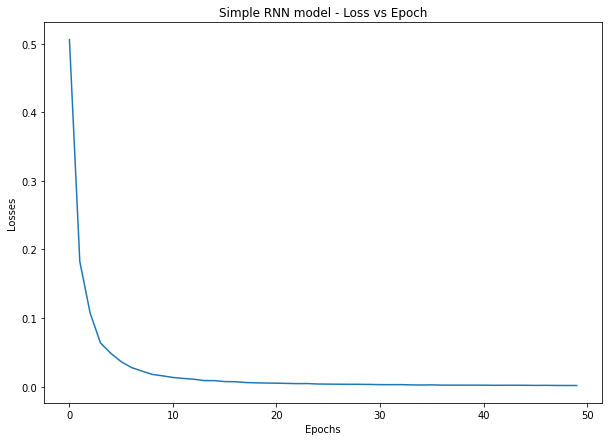

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model - Loss vs Epoch")
plt.show()

# Plotting Accuracy vs Epochs 

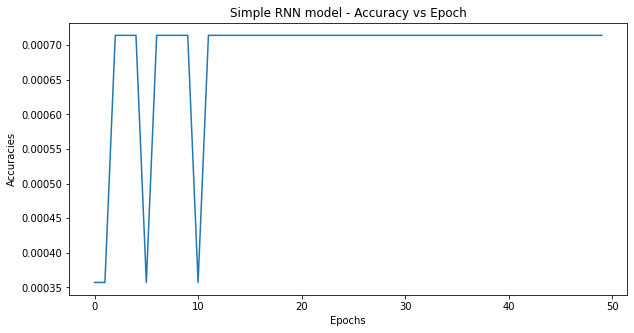

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model - Accuracy vs Epoch")
plt.show()

**Model predictions for train data**

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

131/131 [==============================] - 2s 14ms/step


(4180, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(4180, 1)

In [ ]:
dataset_validation = validation_data.PRC.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (1057, 1)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (1007, 50)
Shape of y_test before reshape : (1007,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (1007, 50, 1)
Shape of y_test after reshape : (1007, 1)


In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

32/32 [==============================] - 0s 14ms/step
Shape of y_pred_of_test : (1007, 1)


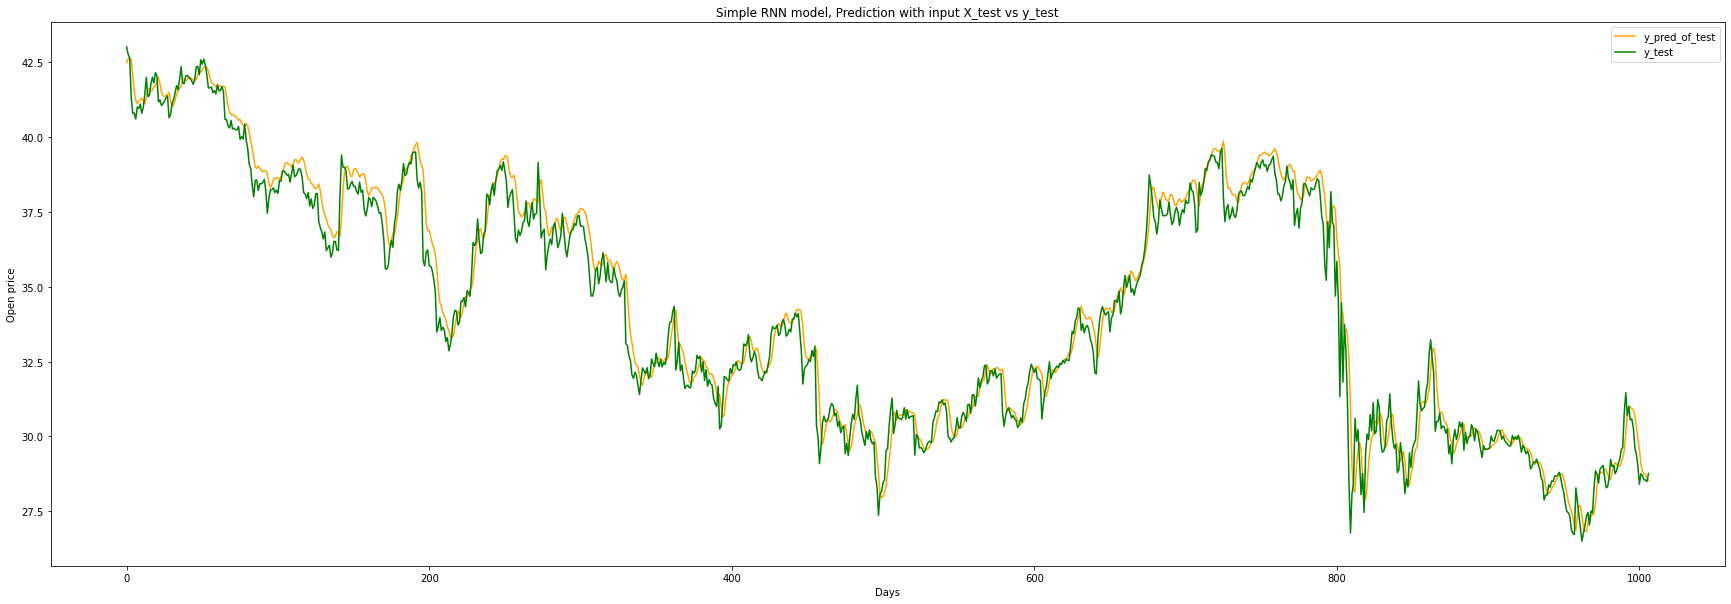

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

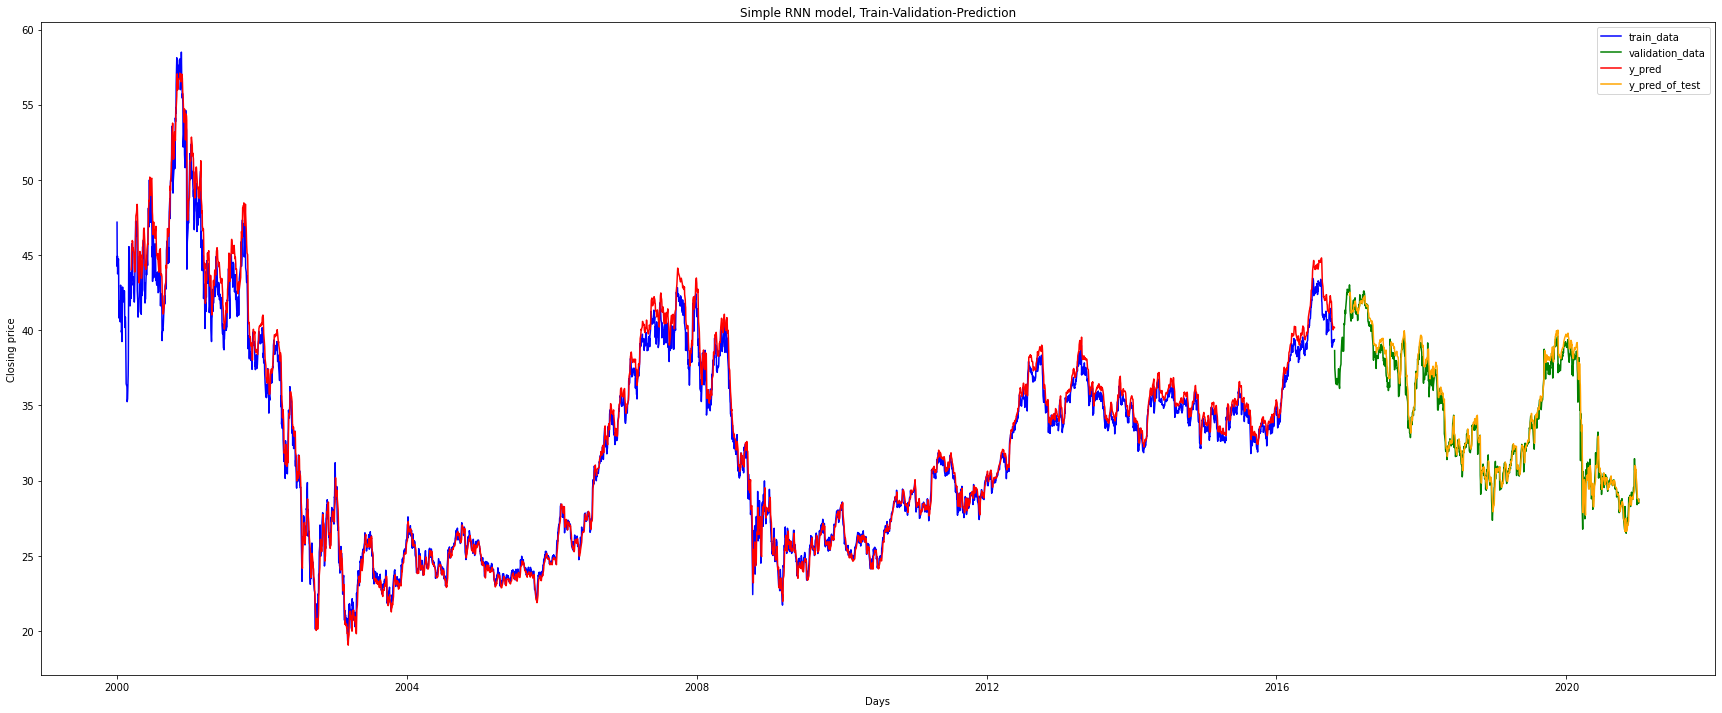

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.DATE, train_data.PRC, label = "train_data", color = "b")
plt.plot(validation_data.DATE, validation_data.PRC, label = "validation_data", color = "g")
plt.plot(train_data.DATE.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.DATE.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Closing price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

# **5. LSTM Model**

We now use the final model to predict the closing stock price - LSTM Model

**Step 1:** We normalise the data and reshape them

In [ ]:
scaler = MinMaxScaler() 

close_price = dataframe1['PRC'].values.reshape(-1, 1) 
# The scaler expects the data to be shaped as (x, y)
scaled_close = scaler.fit_transform(close_price)
scaled_close = scaled_close[~np.isnan(scaled_close)] 
# reshaping data after removing NaNs
scaled_close = scaled_close.reshape(-1, 1) 
# reshaping data after removing NaNs

Functions to preprocess the data.


Spliting the data

In [ ]:
LEN_SEQ = 100 
# creating a sequence of 100 hours at position 0.This function was taken from https://towardsdatascience.com/regression-analysis-lstm-network-to-predict-future-prices-b95dc0db6fcc
def to_sequences(data, LEN_SEQ):
  d = []
  for index in range(len(data) - LEN_SEQ):
    d.append(data[index: index + LEN_SEQ])
  return np.array(d)
def preprocess(data_raw, LEN_SEQ, train_split):
  data = to_sequences(data_raw, LEN_SEQ)
  num_train = int(train_split * data.shape[0])
  X_train = data[:num_train, :-1, :]
  y_train = data[:num_train, -1, :]
  X_test = data[num_train:, :-1, :]
  y_test = data[num_train:, -1, :]
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, LEN_SEQ, train_split = 0.8) 
# 20% of the data saved for testing.
print(X_train.shape, X_test.shape)

(4149, 99, 1) (1038, 99, 1)


**Step 2:** 20% Dropout is used to prevent over-fitting during training of data

**Step 3:** Create the input layer,hidden layers followed by the output layer.

**Step 4:** Compile the layer!! It took me almost 110 minutes to compile this!!! WARNING!!

In [ ]:
out = 0.2 
# 20% Dropout is used to prevent over-fitting during training of data
WINDOW_SIZE = LEN_SEQ - 1
model = keras.Sequential()
# Input layer
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, X_train.shape[-1])))
"""Bidirectional RNNs allows to train on the sequence data in forward and backward direction."""
model.add(Dropout(rate=out))
# 1st Hidden layer
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences = True)))
model.add(Dropout(rate=out))
# 2nd Hidden layer
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
# output layer
model.add(Dense(units=1))
model.add(Activation('linear'))
"""We use Linear activation function which activation is proportional to the input."""
BATCH_SIZE = 64
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, shuffle=False, validation_split=0.1)

Epoch 1/50
59/59 [==============================] - 135s 2s/step - loss: 0.0280 - val_loss: 0.0060
Epoch 2/50
59/59 [==============================] - 112s 2s/step - loss: 0.0151 - val_loss: 0.0019
Epoch 3/50
59/59 [==============================] - 118s 2s/step - loss: 0.0056 - val_loss: 0.0010
Epoch 4/50
59/59 [==============================] - 122s 2s/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/50
59/59 [==============================] - 129s 2s/step - loss: 0.0052 - val_loss: 0.0034
Epoch 6/50
59/59 [==============================] - 129s 2s/step - loss: 0.0026 - val_loss: 0.0017
Epoch 7/50
59/59 [==============================] - 113s 2s/step - loss: 0.0058 - val_loss: 0.0032
Epoch 8/50
59/59 [==============================] - 116s 2s/step - loss: 0.0023 - val_loss: 9.0702e-04
Epoch 9/50
59/59 [==============================] - 103s 2s/step - loss: 0.0027 - val_loss: 9.6044e-04
Epoch 10/50
59/59 [==============================] - 105s 2s/step - loss: 0.0013 - val_loss: 3.6886e-

**Step 5:** Plot the graph of loss against epoch with the training and testing data

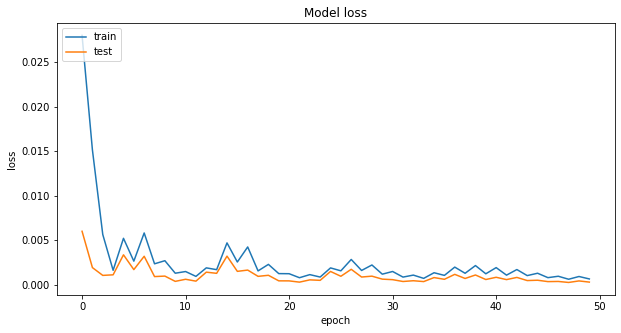

In [ ]:
# plot the graph for loss
plt.figure(figsize = (10,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Step 6:** Predictions from the model using those data to validate the goodness of fit of our model

In [ ]:
# prediction on test data
y_pred = model.predict(X_test) 
# invert the test to original values
y_test_inverse = scaler.inverse_transform(y_test)

# invert the prediction back to normal values
y_pred_inverse = (scaler.inverse_transform(y_pred)) 

33/33 [==============================] - 13s 318ms/step


**Step 7:** Accuracy Metrics of the LSTM Model


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)*100}%')
print(f'MSE: {mean_squared_error(y_test, y_pred)*100}%')
print(f'RMSE score: {np.sqrt(mean_squared_error(y_test, y_pred))*100}%')
print(f'R2 score: {r2_score(y_test, y_pred)*100}%')

MAE: 1.3582653719592046%
MSE: 0.03238418891314416%
RMSE score: 1.7995607495481822%
R2 score: 97.04406405425664%


**Step 8:** Performance Visualisation

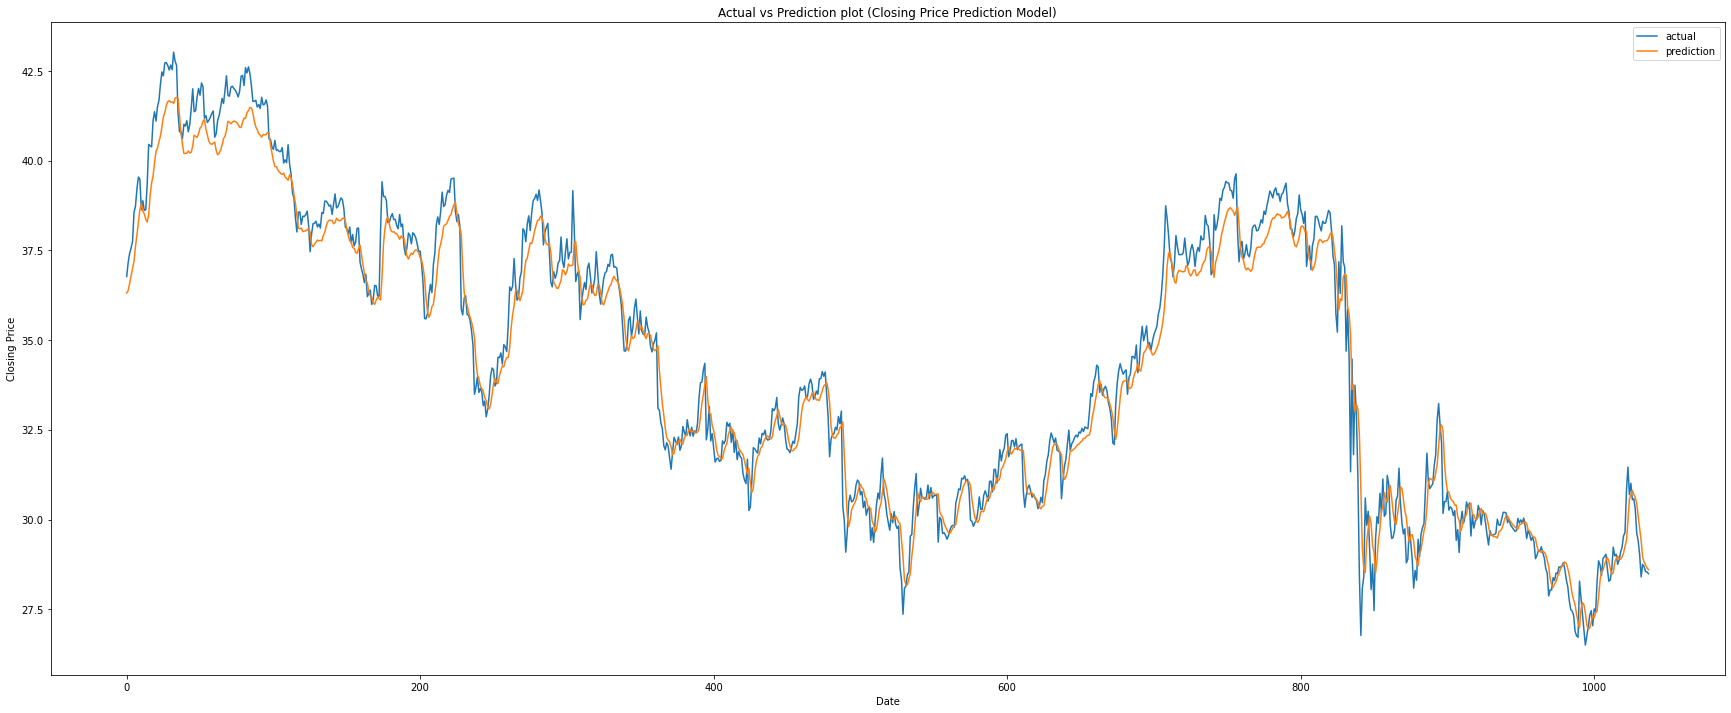

In [ ]:
plt.figure(figsize = (30,12))
plt.plot(y_test_inverse)
plt.plot(y_pred_inverse)
plt.title('Actual vs Prediction plot (Closing Price Prediction Model)')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend(['actual', 'prediction'], loc='upper right')
plt.show()